## LAB- 0
Introduction to Soft computing , and discussion on what we have to do.
1. In 4th week, A presentation submission will take place and it will be about what has been covered in class and how we have precieved it.
2. Class Assessment will take place. Two before Mid term and Two After.

**Class TASK -** Downloading the Interpretator library for Python in code editor and getting familiar with it . Running a Simple Neural Network.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings

warnings.filterwarnings("ignore")
# Example values for placeholders
input_shape = (784,)  # Assuming 28x28 images flattened, e.g., MNIST dataset
num_classes = 10      # Number of classes for classification, e.g., digits 0-9

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=input_shape),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Example data (replace with actual data)
# x_train, y_train, x_test, y_test should be defined appropriately
# For illustration purposes, we use random data
import numpy as np
x_train = np.random.random((60000, 784))
y_train = np.random.randint(10, size=(60000,))
x_test = np.random.random((10000, 784))
y_test = np.random.randint(10, size=(10000,))

# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=2)  # Verbose set to 2 for detailed logs

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.0983 - loss: 2.3051 - val_accuracy: 0.1075 - val_loss: 2.3025
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.1012 - loss: 2.3028 - val_accuracy: 0.1075 - val_loss: 2.3025
Epoch 3/5
1875/1875 - 5s - 2ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1075 - val_loss: 2.3024
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1075 - val_loss: 2.3025
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1075 - val_loss: 2.3024
313/313 - 1s - 2ms/step - accuracy: 0.1075 - loss: 2.3024
Test accuracy: 0.1075


## LAB - 1
**Class Task -**
1. How to construct a code and implement it ( Single Layer Perceptron ).
2. Perceptron Classifier for Binary Classification on Iris Dataset with Decision Boundary Visualization

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings

warnings.filterwarnings("ignore")

Import Libraries:

* Import necessary libraries including NumPy, Matplotlib, and the Iris dataset from scikit-learn.
* Suppress warnings for a cleaner output.

In [ ]:
# Load Iris dataset
data = load_iris()
X = data.data[:100, :2]
y = data.target[:100]
y = np.where(y == 0, -1, 1)

Load the Iris dataset:
* Extract the first 100 samples and the first two features for binary classification.
* Convert class labels to -1 and 1 for use with the perceptron algorithm.

In [ ]:
# Perceptron
class Perceptron:
    def __init__(self, lr=0.1, n_iter=50):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Define Perceptron Class:
* Initialize the perceptron with learning rate (lr) and number of iterations (n_iter).

fit method:
* Initialize weights to zeros.
* Iterate over the dataset for the specified number of iterations.
* Update weights based on the prediction error.
* Track the number of errors in each iteration.

net_input method:
* Calculate the net input by taking the dot product of input features and weights.

predict method:
* Apply the unit step function to net input to make a prediction.

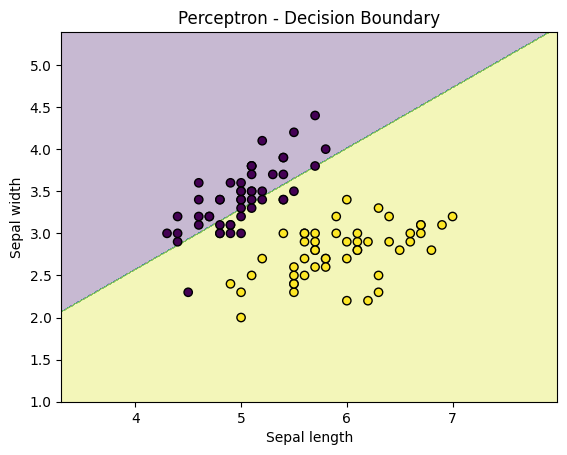

In [ ]:
# Instantiate and train the perceptron
perceptron = Perceptron(lr=0.1, n_iter=50)
perceptron.fit(X, y)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Perceptron - Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, perceptron)

Train the Perceptron:
* Instantiate the perceptron object with a learning rate of 0.1 and 50 iterations.
* Fit the perceptron model to the Iris dataset.

Plot Decision Boundary:

* Define a function to plot the decision boundary.
* Use a mesh grid to create a grid of points covering the feature space.
* Predict class labels for each point in the grid.
* Plot the decision boundary and the data points for visualization.